In [ ]:
【例13.1】K-Means算法举例。

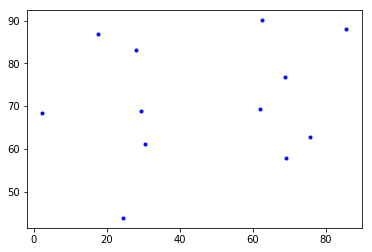

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
x = [2.273, 27.89, 30.519, 62.049, 29.263, 62.657, 75.735, 24.344, 17.667, 68.816, 69.076, 85.691]
y = [68.367, 83.127, 61.07, 69.343, 68.748, 90.094, 62.761, 43.816, 86.765, 76.874, 57.829, 88.114]
plt.plot(x, y, 'b.')  #（x，y）点图如图13-1所示
plt.show()

聚类结果： [1 1 1 0 1 0 0 1 1 0 0 0]


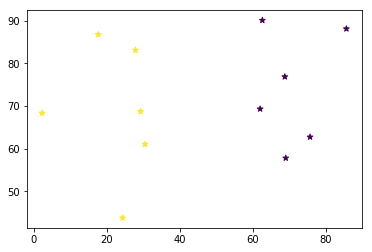

In [3]:
points = [[i,j] for i,j in zip(x,y)]  #  Python递推式，将x和y中的数据依次选出构成点集
y_pred = KMeans(n_clusters=2).fit_predict(points)  # 将数据聚为2类
print('聚类结果：', y_pred)  # 打印聚类的结果
plt.scatter(x, y, c=y_pred, marker='*')
plt.show()

In [ ]:
【例13.2】利用惯性确定法和Calinski-Harabasz值确定K的取值。

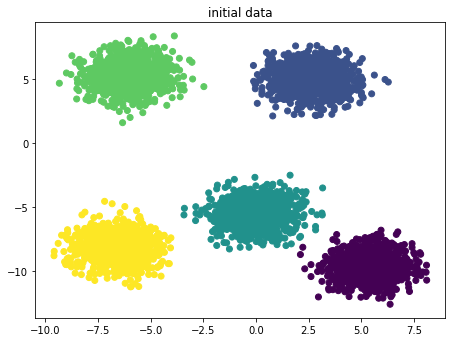

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  # 为聚类产生数据集
from sklearn import metrics
# 以下利用sklearn的make_blobs生成k-means测试数据
n_samples=5000   # 样本数量：5000
random_state=10  # 随机种子
centers=5 #分类数
x, y = make_blobs(centers=centers,n_samples=n_samples, random_state=random_state)  # 生成随机数
plt.figure(figsize=(25, 25))
plt.subplot(4,3,1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.title('initial data')
plt.show() # 生成的测试数据如图13-3所示

In [ ]:
对数据进行计算，K的取值范围在2~9，并记录每一个K取值时的SSE与calinski_harabaz_score值：

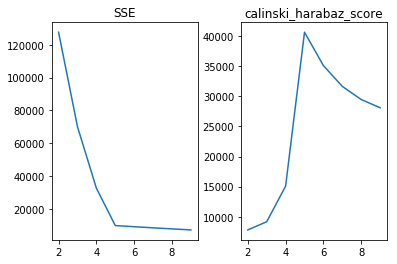

In [5]:
inertia=[]
calinski_harabaz_score=[]
a=2
for i in range(2,10):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++').fit(x)
    y_pred=km.predict(x)
    center_=km.cluster_centers_
    inertia.append([i,km.inertia_])
    z=metrics.calinski_harabaz_score(x, y_pred) 
    calinski_harabaz_score.append([i,z])
inertia=np.array(inertia)
plt.subplot(1,2,1)
plt.plot(inertia[:, 0], inertia[:, 1])
plt.title('SSE')
plt.subplot(1,2,2)
calinski_harabaz_score=np.array(calinski_harabaz_score)
plt.plot(calinski_harabaz_score[:, 0], calinski_harabaz_score[:, 1])
plt.title('calinski_harabaz_score')
plt.subplots_adjust(hspace=0.6,wspace=0.3)
plt.show() # 运行结果如图13-4所示